# Module 11 Challenge
## Deliverable 2: Scrape and Analyse Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [13]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, "html.parser")

In [20]:
# Extract all rows of data
table_data = soup.body.find_all("tr", class_ = "data-row")

1867

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [21]:
# Create an empty list
rows = []
# Loop through the scraped data to create a list of rows
for row in table_data:
    t_list = []
    for item in row:
        t_list.append(item.text)
    rows.append(t_list)

In [22]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = []
titles = soup.body.find("tr")
for name in titles:
    columns.append(name.text)

In [25]:
# Confirm DataFrame was created successfully
data_frame = pd.DataFrame(rows)
data_frame.columns = (columns)
clean_df = data_frame[["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]]
clean_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [26]:
# Examine data type of each column
clean_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [27]:
# Change data types for data analysis
new_cdf = clean_df.astype({"id":int, "terrestrial_date":"datetime64[ns]", "sol":int, "ls":int, "month":int, "min_temp":float, "pressure":float})

In [28]:
# Confirm type changes were successful by examining data types again
new_cdf.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyse the Data

Analyse your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [30]:
# 1. How many months are there on Mars?
new_cdf["month"].value_counts().sort_index()

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

In [31]:
# 2. How many Martian days' worth of data are there?
len(new_cdf["sol"].unique())

1867

In [33]:
# 3. What is the average low temperature by month?
avg_lows_monthly = new_cdf.groupby("month").agg({"min_temp":"mean"})
avg_lows_monthly

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


<Axes: title={'center': 'Average Monthly Lowest Temperatures on Mars'}, xlabel='Month', ylabel='Temperature (°C)'>

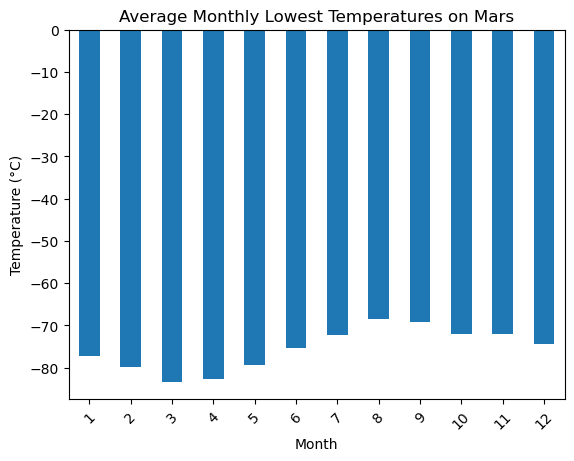

In [34]:
# Plot the average temperature by month
avg_lows_monthly.plot.bar(title="Average Monthly Lowest Temperatures on Mars",
                          xlabel="Month", ylabel="Temperature (°C)",
                          legend=False, rot=45)

<Axes: xlabel='Month', ylabel='Temperature (°C)'>

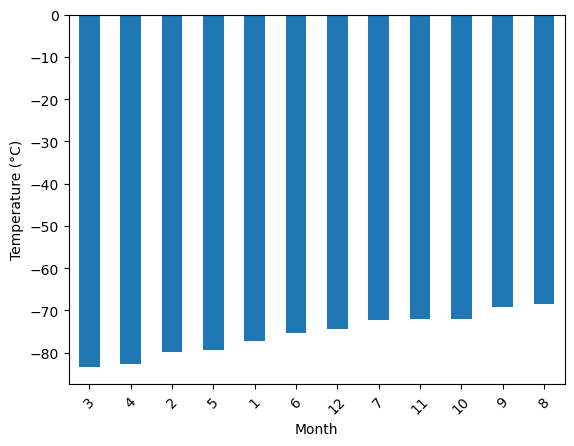

In [36]:
# Identify the coldest and hottest months in Curiosity's location
avg_lows_monthly.sort_values("min_temp").plot.bar(legend=False,rot=45,xlabel="Month",ylabel="Temperature (°C)")

The coldest month is Martian month 3, and the warmest month is Martian month 8.

In [37]:
# 4. Average pressure by Martian month
avg_press_monthly = new_cdf.groupby("month").agg({"pressure":"mean"})
avg_press_monthly

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


<Axes: title={'center': 'Average Pressure on Mars per Martian Month'}, xlabel='Month', ylabel='Atmospheric Pressure'>

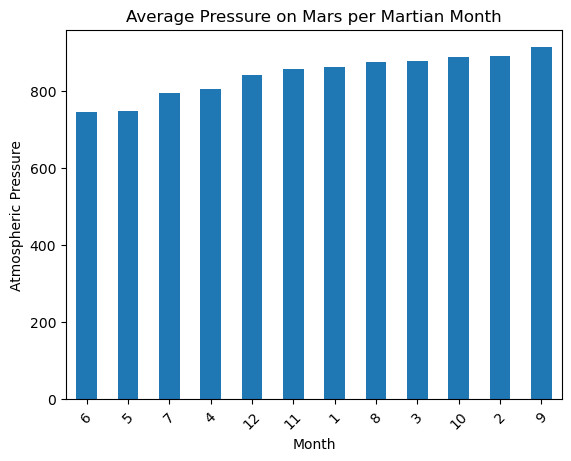

In [38]:
# Plot the average pressure by month
avg_press_monthly.sort_values("pressure").plot.bar(title="Average Pressure on Mars per Martian Month", xlabel="Month",
                                                   ylabel="Atmospheric Pressure", legend=False, rot=45)

Average pressure on Mars is observed to be lowest in the 6th month and highest in the 9th month.

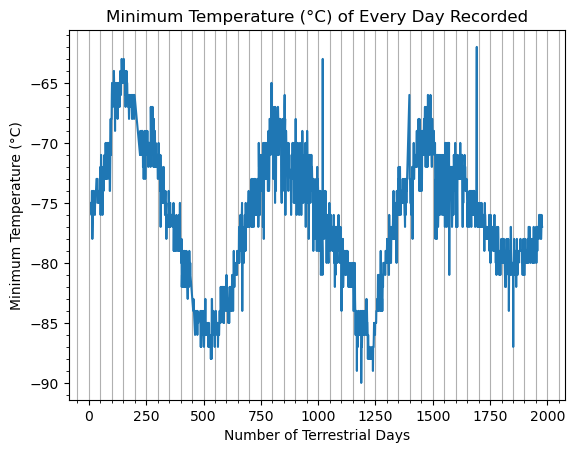

In [41]:
# 5. How many terrestrial (earth) days are there in a Martian year?
plt.plot(new_cdf["sol"], new_cdf["min_temp"])
plt.title("Minimum Temperature (°C) of Every Day Recorded")
plt.xlabel("Number of Terrestrial Days")
plt.ylabel("Minimum Temperature (°C)")
plt.minorticks_on()
plt.grid(which="both", axis="x")
plt.show()

Temperature peaks seem to occur on days: 150, 800 and ~1485 (not counting any visible outliers). Temperature troughs seem to occur on days: ~540, ~1190 and 1850. The Martian year can be approximately calculated through the following: <br>
800 - 150 = 650 <br>
1485 - 800 = 685 <br>
1190 - 540 = 650 <br>
1850 - 1190 = 660 <br>
(650 + 685 + 650 + 660) / 4 = **661.25** days

According to NASA, there are **687** days in a Martian Year [Source](https://mars.nasa.gov/all-about-mars/facts/mars-year/#:~:text=On%20Feb.,year%20is%20687%20Earth%20days)

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [43]:
# Write the data to a CSV
new_cdf.to_csv("mars_weather.csv", header=True, index=False, date_format="%Y-%m-%d")

In [44]:
browser.quit()